In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/My Drive/Theatrical Market Synopsis/

/gdrive/My Drive/Theatrical Market Synopsis


In [4]:
ls

AnnualTicketSales.csv     TopDistributors.csv     TopGrossingSources.csv
HighestGrossers.csv       TopGenres.csv           TopProductionMethods.csv
PopularCreativeTypes.csv  TopGrossingRatings.csv  WideReleasesCount.csv


Import Dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file

In [6]:
TopProductionMethod = pd.read_csv("TopProductionMethods.csv");
TopDistributors = pd.read_csv("TopDistributors.csv");
TopGenres = pd.read_csv("TopGenres.csv");
PopularCreativeTypes = pd.read_csv("PopularCreativeTypes.csv");
TopGrossingRatings = pd.read_csv("TopGrossingRatings.csv");
TopGrossingSources = pd.read_csv("TopGrossingSources.csv");
HighestGrossers = pd.read_csv("HighestGrossers.csv");
AnnualTicketSales = pd.read_csv("AnnualTicketSales.csv",thousands = ',');
WideReleasesCount = pd.read_csv("WideReleasesCount.csv");

Annual Ticket sale

In [7]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,423774881,"$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,223638958,"$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,1228541629,"$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,1311536128,"$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,1225639761,"$10,993,991,460","$11,226,860,216",$8.97,NaN


In [8]:
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace(',', '')
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$', '')
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',', '')
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$', '')
AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$', '')
AnnualTicketSales.drop('Unnamed: 5', axis = 1 , inplace = True)

In [9]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


In [10]:
AnnualTicketSales["TOTAL BOX OFFICE"] = AnnualTicketSales["TOTAL BOX OFFICE"].astype(str).astype(int)

In [11]:
AnnualTicketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   YEAR                                 27 non-null     int64 
 1   TICKETS SOLD                         27 non-null     int64 
 2   TOTAL BOX OFFICE                     27 non-null     int64 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object
 4   AVERAGE TICKET PRICE                 27 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [12]:
AnnualTicketSales.isnull().sum()

YEAR                                   0
TICKETS SOLD                           0
TOTAL BOX OFFICE                       0
TOTAL INFLATION ADJUSTED BOX OFFICE    0
AVERAGE TICKET PRICE                   0
dtype: int64

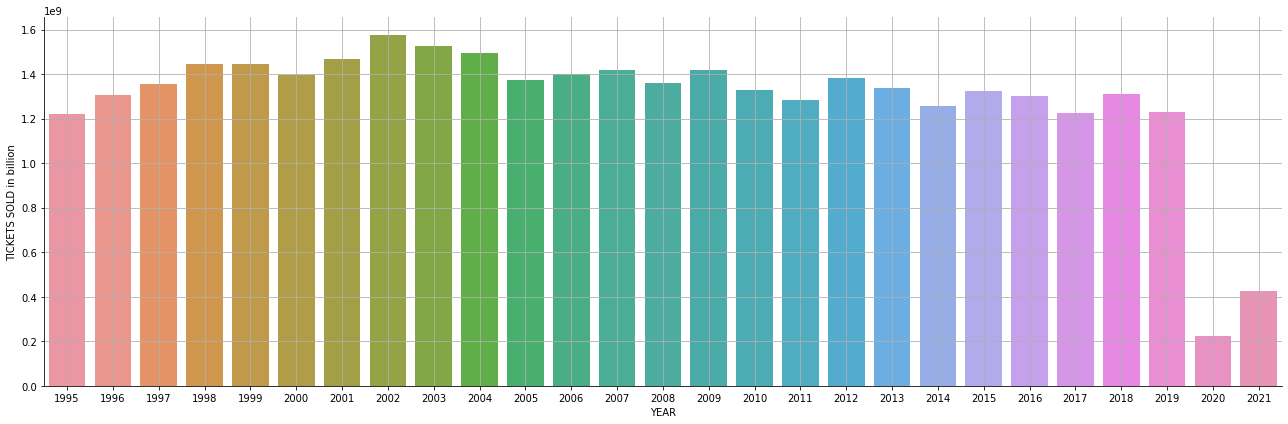

In [13]:
ax = sns.catplot(y="TICKETS SOLD", x="YEAR", kind="bar", data=AnnualTicketSales, height=6, aspect=3)
plt.ylabel("TICKETS SOLD in billion")
plt.grid(True)

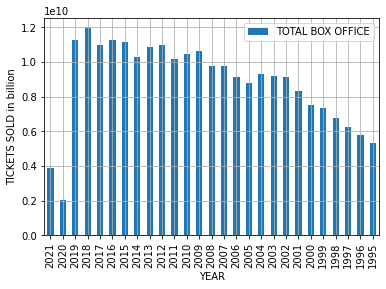

In [14]:
AnnualTicketSales.plot.bar(x='YEAR',y='TOTAL BOX OFFICE')
plt.ylabel("TICKETS SOLD in billion")
plt.grid(True)

Highest Grossers

In [15]:
HighestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [16]:
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace(',', '')
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace('$', '')
HighestGrossers["TOTAL FOR YEAR"] = HighestGrossers["TOTAL FOR YEAR"].astype(str).astype(int)

In [17]:
df1 = pd.DataFrame(HighestGrossers, columns = ['MOVIE','TOTAL FOR YEAR'])
df1.sort_values(by=['TOTAL FOR YEAR'], ascending = False,inplace=True)

Top 10 movie of all time by total earning

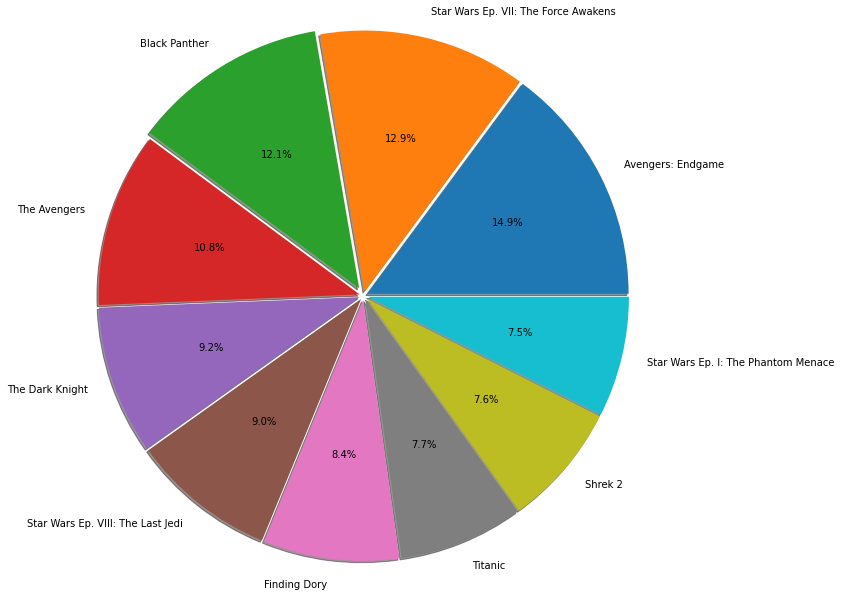

In [18]:
plt.pie(df1['TOTAL FOR YEAR'][0:10],labels = df1['MOVIE'][0:10],autopct='%1.1f%%',explode = (0.05,0.05, 0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.05),radius=3,shadow=True)
plt.show()

Top Genres

In [19]:
TopGenres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [20]:
TopGenres['TOTAL GROSS'] = TopGenres['TOTAL GROSS'].str.replace(',', '')
TopGenres['TOTAL GROSS'] = TopGenres['TOTAL GROSS'].str.replace('$', '')
TopGenres["TOTAL GROSS"] = TopGenres["TOTAL GROSS"].astype(str).astype(int)

Text(0.5, 1.0, 'Popular Genres')

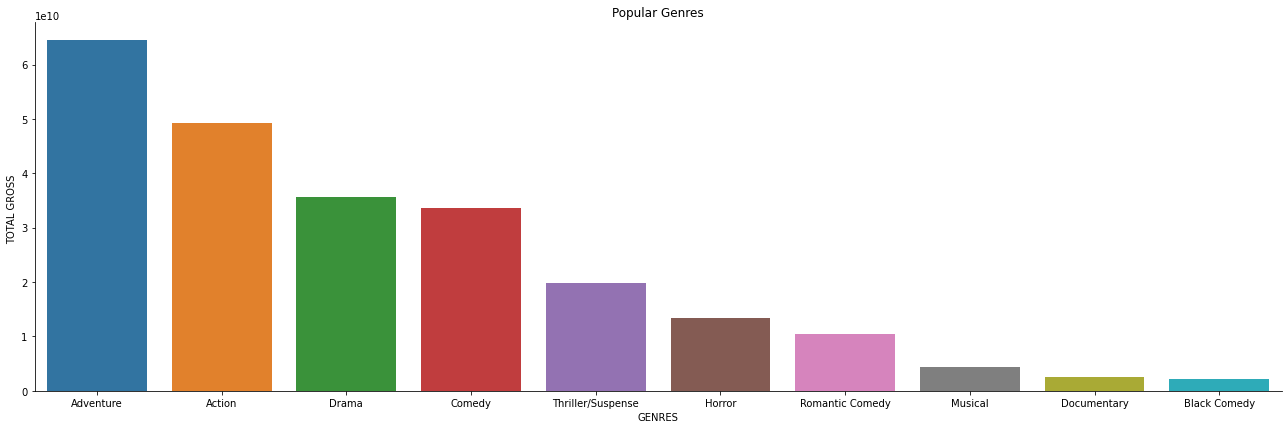

In [21]:
ax = sns.catplot(y="TOTAL GROSS", x="GENRES", kind="bar", data=TopGenres, height=6, aspect=3)
plt.ylabel("TOTAL GROSS ")
plt.title("Popular Genres")